# Research Summary for May 30th 2023

## Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

Here we will look at the analytic speed-up derived for the $iSWAP$ gate and see whether the numerics can generate the same speed-up. This was previously explored, but no significant speed-up was seen. Our analytical protocol only has 3 segments, and thus we will fix our segments to 3 while testing different combinations of drives to see if the $\sqrt{2}$ speed up is achievable. 

Now we will use the derivate coupling gate for our $iSWAP$ gate protocol with both qubit and qutrit drives. 

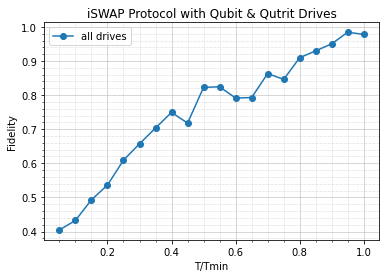

In [3]:
allDrives_DF = pd.read_csv("Data/iSWAP_Protocol/all.csv",names=["fidelity","time"])
allDrives_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])

Here we observe that there does not seem to be a factor of a $\sqrt{2}$ speed up. Also there are some suprisingly non-smoothness for our graph. With a large amount of iterations and random seem averaging, we mostly smooth points for all plots. This might hint at that the numerics are having difficulty stabilizing on a minimum infidelity count.  For this protocol. (Compare to just qubit) This matches our previous finding for the $iSWAP$ gate. Now lets look at if we can find a speed-up if there are only qutrit drives ($X$ and $Y$ drives for the $|1>\to|2>$ transition)

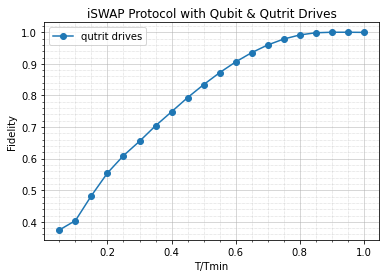

In [4]:
qutrits_DF = pd.read_csv("Data/iSWAP_Protocol/qutrits.csv",names=["fidelity","time"])
qutrits_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["qutrit drives"])

Here it seems as though we do see a speed-up! This is quite suprising as with the qubit drives, there was no visible speed-up. Plotting the two graphs, we have

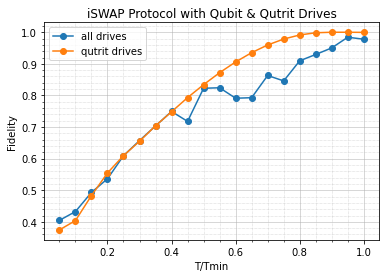

In [5]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])

Thus our speed up is visually verified. Also note that the numerical calculation with all drives matches our qutrit drive case until around $T = \sim0.5T_{min}$. This may indicate that speed up solution is sparse and our numerics are having difficulty finding it for larger time steps. (do qubit case for $\sqrt{2}$ and normal time)

For our last test, we will see if we can achieve a speed-up for only a $Y$ qutrit drive. This is the only necessary drive for our analytical protocol. 

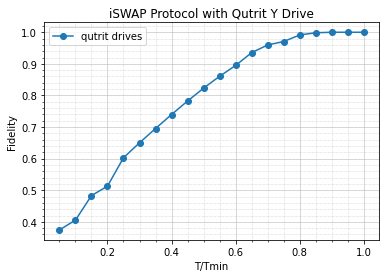

In [7]:
yquit_DF = pd.read_csv("Data/iSWAP_Protocol/y_qutrit.csv",names=["fidelity","time"])
yquit_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qutrit Y Drive",yquit_DF,["qutrit drives"])

Initially we can see that we generate the $\sqrt{2}$ speed-up seen in the qutrit drive case. Combinding all plots, we have

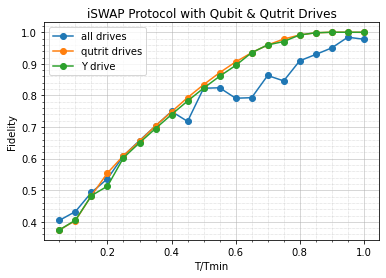

In [8]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",yquit_DF,["all drives","qutrit drives","Y drive"])

Thus we see that if the qutrit drives (either both or only the $Y$ drive), we achieve the speed-up seen in the analytical protocol. Suprisingly we do not see this when we have both qubit and qutrit drives. This lack of speed-up may be due to the larger amount of parameters used in the qubit & qutrit drives. The optimizer may have difficulty with larger amount of parameters. Note that we have are using Stochastic Gradient Descent and other optimizers may perform differently. 

We have compared the $iSWAP$ protocol with different types of drives. Now let's compare these protocols to the qubit system with $X$ and $Y$ drives with couplings strengths $g= 1$ and $g=\sqrt{2}$ respectably. 

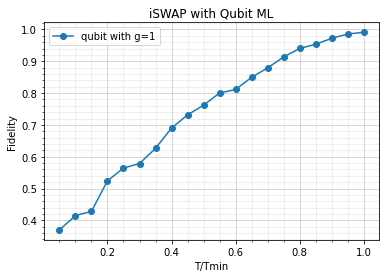

In [10]:
qubits_DF = pd.read_csv("Data/iSWAP_Protocol/qubit.csv",names=["fidelity","time"])
qubits_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])

This is to be expected with saturation of the speed limit at $T_{min}=1$. Note that we are not putting a cap on the drive strength. Now let's look at the $g=\sqrt{2}$ coupling case. 

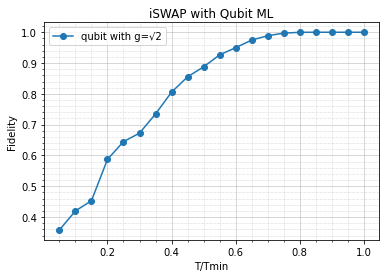

In [12]:
qubits_gR2_DF = pd.read_csv("Data/iSWAP_Protocol/qubit_gRoot2.csv",names=["fidelity","time"])
qubits_gR2_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["qubit with g=\u221A2"])

Plotting both the couplings strengths, we have 

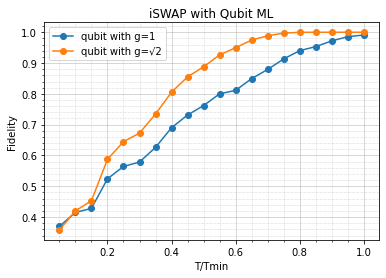

In [13]:
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["qubit with g=1","qubit with g=\u221A2"])

We see the expected speed up from increasing the respective coupling strength. Now let's compare this to our qutrit protocl 

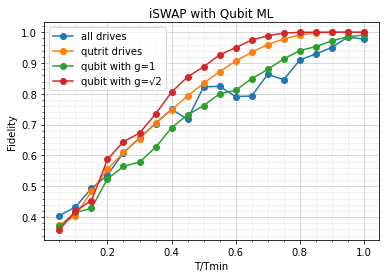

In [15]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])
#genPlot("iSWAP Protocol with Qubit & Qutrit Drives",yquit_DF,["all drives","qutrit drives","Y drive"])
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["all drives","qutrit drives","qubit with g=1","qubit with g=\u221A2"])

While this graph is a little cluttered, it is the most hollistic comparison for the $iSWAP$ protocol. Note that I used the projection of our coupling matrix onto the qubit subspace as our coupling matrix for qubit numerics. 

I am going to rerun the calculation with $XX$ coupling for an apt comparison 

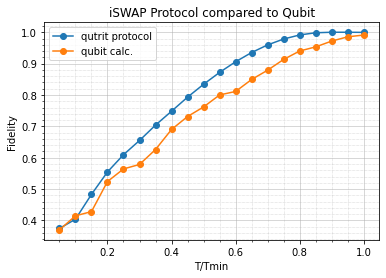

In [20]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])
genPlot("iSWAP Protocol compared to Qubit",qubits_DF,["qutrit protocol","qubit calc."])
plt.savefig(os.path.join(os.getcwd(),"Research_Summaries/Figures","iSWAP_Comparison.pdf"), format="pdf")